In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('/content/drive/MyDrive/datasets/NY-House-Dataset.csv')

[Ссылка на датасет](https://www.kaggle.com/datasets/nelgiriyewithana/new-york-housing-market?resource=download)

### Посмотрим на датасет

In [10]:
df.sample(3)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
1362,Brokered by Coldwell Banker Advantage,House for sale,2350000,5,4.0,4270.000000,144 Dunham St,"Staten Island, NY 10309","144 Dunham StStaten Island, NY 10309",United States,New York,Richmond County,Staten Island,Dunham Street,"144 Dunham St, Staten Island, NY 10309, USA",40.525174,-74.217604
1325,Brokered by Keller Williams Realty Liberty,Co-op for sale,232500,1,1.0,2184.207862,123-35 82nd Rd Unit 3R,"Kew Gardens, NY 11415","123-35 82nd Rd Unit 3RKew Gardens, NY 11415",New York,Queens County,Queens,Kew Gardens,123-35,"123-35 82nd Rd #3r, Kew Gardens, NY 11415, USA",40.712137,-73.827708
4757,Brokered by COMPASS,Co-op for sale,275000,2,1.0,815.000000,800 Grand Concourse Apt Gms,"Bronx, NY 10451","800 Grand Concourse Apt GmsBronx, NY 10451",United States,New York,Bronx County,The Bronx,Grand Concourse,"800 Grand Concourse, Bronx, NY 10451, USA",40.824870,-73.922983


Отбросим некоторые столбцы, они не будут интересны нам для анализа. А в столбце STATE оставим только название:

In [11]:
df['STATE'] = df['STATE'].str.split(',').str[0]
df = df.drop(['ADMINISTRATIVE_AREA_LEVEL_2', 'ADDRESS', 'LONG_NAME', 'SUBLOCALITY', 'FORMATTED_ADDRESS'], axis = 1)

Некоторые объекты содержат дробное число ванных. Отбросим дробную часть и превратим тип столбца в int:

In [12]:
df['BATH'] = df['BATH'].astype('int')

In [13]:
df.sample(3)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,STATE,MAIN_ADDRESS,LOCALITY,STREET_NAME,LATITUDE,LONGITUDE
2213,Brokered by Staten Island Premiere Properties,Multi-family home for sale,1399999,4,4,2776.000000,Staten Island,"196 Bennett AveStaten Island, NY 10312",New York,Staten Island,40.536566,-74.183942
1665,Brokered by Jonarbri Realty,Co-op for sale,385000,2,1,2184.207862,Brooklyn,"420 44th St Apt 3Brooklyn, NY 11220",Kings County,Sunset Park,40.649346,-74.008700
4136,Brokered by Joseph Baratta & Company Realty,House for sale,629000,3,2,1575.000000,Bronx,"3312 Paulding Ave Unit ABronx, NY 10469",New York,The Bronx,40.873488,-73.858233


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BROKERTITLE   4801 non-null   object 
 1   TYPE          4801 non-null   object 
 2   PRICE         4801 non-null   int64  
 3   BEDS          4801 non-null   int64  
 4   BATH          4801 non-null   int64  
 5   PROPERTYSQFT  4801 non-null   float64
 6   STATE         4801 non-null   object 
 7   MAIN_ADDRESS  4801 non-null   object 
 8   LOCALITY      4801 non-null   object 
 9   STREET_NAME   4801 non-null   object 
 10  LATITUDE      4801 non-null   float64
 11  LONGITUDE     4801 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 450.2+ KB


### Проведем анализ

#### Тепловая карта

Построим тепловую карту для столбцов с числами.

<Axes: >

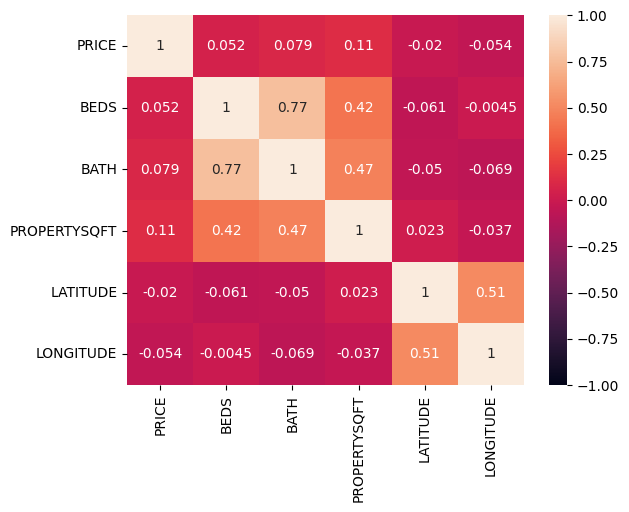

In [15]:
cols = ['PRICE','BEDS','BATH','PROPERTYSQFT','LATITUDE','LONGITUDE']

sns.heatmap(df[cols].corr(), vmax=1, vmin=-1, annot=True)

Отсюда видим наличие связи между количеством кроватей, ванн и площадью объекта (столбцы BEDS, BATH и PROPERTYSQFT), что вполне очевидно. А вот связь широты и долготы (LATITUDE и LONGITUDE) менее очевидна. Давайте посмотрим на карте:

In [19]:
df

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,STATE,MAIN_ADDRESS,LOCALITY,STREET_NAME,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2,1400.000000,New York,"2 E 55th St Unit 803New York, NY 10022",New York,East 55th Street,40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10,17545.000000,New York,Central Park Tower Penthouse-217 W 57th New Yo...,New York,New York,40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2,2015.000000,Staten Island,"620 Sinclair AveStaten Island, NY 10312",New York,Staten Island,40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1,445.000000,Manhattan,"2 E 55th St Unit 908W33Manhattan, NY 10022",New York,New York,40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2,14175.000000,New York,"5 E 64th StNew York, NY 10065",New York,New York,40.767224,-73.969856
...,...,...,...,...,...,...,...,...,...,...,...,...
4796,Brokered by COMPASS,Co-op for sale,599000,1,1,2184.207862,Manhattan,"222 E 80th St Apt 3AManhattan, NY 10075",New York County,Manhattan,40.774350,-73.955879
4797,Brokered by Mjr Real Estate Llc,Co-op for sale,245000,1,1,2184.207862,Rego Park,"97-40 62 Dr Unit LgRego Park, NY 11374",New York,Queens,40.732538,-73.860152
4798,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1275000,1,1,2184.207862,New York,"427 W 21st St Unit GardenNew York, NY 10011",New York,New York,40.745882,-74.003398
4799,Brokered by E Realty International Corp,Condo for sale,598125,2,1,655.000000,Elmhurst,"91-23 Corona Ave Unit 4GElmhurst, NY 11373",Queens County,Flushing,40.742770,-73.872752


In [28]:
coords = np.array([df['LATITUDE'], df['LONGITUDE']]).T.tolist()

import folium
from folium import plugins

places = pd.DataFrame({"Places": df['MAIN_ADDRESS'], "Coords": coords })

map = folium.Map(places['Coords'][0], tiles = 'OpenStreetMap', zoom_start=13)
plugins.MarkerCluster(places['Coords']).add_to(map)

(Карта находится в репозитории в файле map.png)

И действительно видим, что недвижимость находятся на диагонали. Как и собственно сам город Нью-Йорк.

#### На какой улице самая большая цена за кв. метр недвижимости?

Будем рассматривать улицы, на которых есть хотя бы 5 объектов недвижимости:

In [ ]:
df['Price_per_square'] = df['PRICE']/df['PROPERTYSQFT']
avg_price = df.groupby(['LOCALITY','STREET_NAME']).agg({'Price_per_square': ['mean', 'count']})
avg_price.columns = ['price_per_square', 'houses_amount']

avg_price = avg_price[avg_price['houses_amount']>=5].sort_values('price_per_square', ascending=False)
avg_price

price_per_square  houses_amount
LOCALITY        STREET_NAME                                       
New York        New York                2315.271230            285
Kings County    Dumbo                   1557.525936             10
                Greenpoint              1352.434387              7
New York County Manhattan               1220.484511            979
Kings County    Downtown Brooklyn       1120.862583              9
...                                             ...            ...
Queens County   Jamaica                  192.879373             40
Bronx County    Norwood                  191.434420              5
Queens County   Howard Beach             182.992205             14
Bronx County    Highbridge               124.306421              6
Queens County   Woodhaven                112.702949              6

[76 rows x 2 columns]

К сожалению, в New York нет улицы New York. В этих строках название улицы внесенно некорректно, поэтому придется их убрать из рассмотрения(это всего 5,9% от общего числа недвижимости).

Получили топ 10 улиц с самой высокой стоимостью квадратного метра:

In [ ]:
avg_price = avg_price.iloc[1:11,].reset_index()

<BarContainer object of 10 artists>

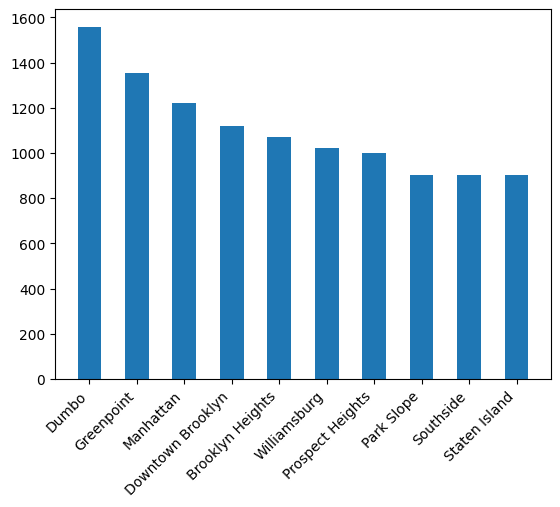

In [ ]:
fig, ax = plt.subplots()
ax.set_xticks([i for i in range(10)])
ax.set_xticklabels(avg_price['STREET_NAME'], rotation=45, ha="right")

plt.bar(avg_price['STREET_NAME'], avg_price['price_per_square'], width=0.5)

In [ ]:
df = df.drop('Price_per_square', axis = 1) #этот столбец нам больше не понадобится

##### В каком районе топовые брокеры в основном продают недвижимость?

In [ ]:
df.sample(5)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,STATE,MAIN_ADDRESS,LOCALITY,STREET_NAME,LATITUDE,LONGITUDE
4127,Brokered by Corcoran Park Slope,Pending,2650000,5,2,2500.000000,New York,"64 E 86th St # 10BANew York, NY 10028",New York County,Manhattan,40.780451,-73.958214
4663,Brokered by COMPASS,Co-op for sale,749000,2,1,2184.207862,Manhattan,"314 E 41st St Apt 702BManhattan, NY 10017",New York County,Manhattan,40.748888,-73.972395
2921,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,875000,2,1,922.000000,Brooklyn,"1437 Hancock St # BBrooklyn, NY 11237",New York,Brooklyn,40.696598,-73.907174
2632,Brokered by DNLS Real Estate Mgmt LLC,Co-op for sale,349999,1,1,2184.207862,Rego Park,"97-37 63rd Rd Unit 11FRego Park, NY 11374",Queens County,Rego Park,40.731896,-73.859965
3613,Brokered by Re/Max In The City,Co-op for sale,279900,1,1,850.000000,Bronx,"679 W 239th Ave Unit 3KBronx, NY 10463",Bronx County,Riverdale,40.890176,-73.914626


Возьмем топ-10 брокеров по кол-ву недвижимости:

In [ ]:
top_10_brokers = df['BROKERTITLE'].value_counts().reset_index()
top_10_brokers = top_10_brokers.loc[:9,'BROKERTITLE']
top_10_brokers

,BROKERTITLE
0,Brokered by COMPASS
1,Brokered by Douglas Elliman - 575 Madison Ave
2,Brokered by Brown Harris Stevens
3,Brokered by Corcoran East Side
4,Brokered by RE MAX Edge
5,Brokered by Winzone Realty Inc
6,Brokered by Sotheby's International Realty - E...
7,Brokered by E Realty International Corp
8,Brokered by Serhant
9,Brokered by RE MAX Real Estate Professionals


In [ ]:
top_10_brokers = df[df['BROKERTITLE'].isin(top_10_brokers)]
top_10_brokers = top_10_brokers.groupby(['BROKERTITLE','STATE']).agg({'MAIN_ADDRESS':'count'})
top_10_brokers = top_10_brokers.sort_values(['BROKERTITLE', 'MAIN_ADDRESS'], ascending=[True, False])
top_10_brokers

MAIN_ADDRESS
BROKERTITLE                      STATE                          
Brokered by Brown Harris Stevens Manhattan                    62
                                 Bronx                        16
                                 Brooklyn                     15
Brokered by COMPASS              Manhattan                   292
                                 Brooklyn                    108
...                                                          ...
Brokered by Winzone Realty Inc   Kew Gardens                   1
                                 Kew Gardens Hills             1
                                 South Ozone Park              1
                                 Staten Island                 1
                                 Woodhaven                     1

[76 rows x 1 columns]

In [ ]:
top_10_brokers = top_10_brokers.reset_index()

И получаем для каждого брокера свой топ районов по кол-ву объектов недвижимости:

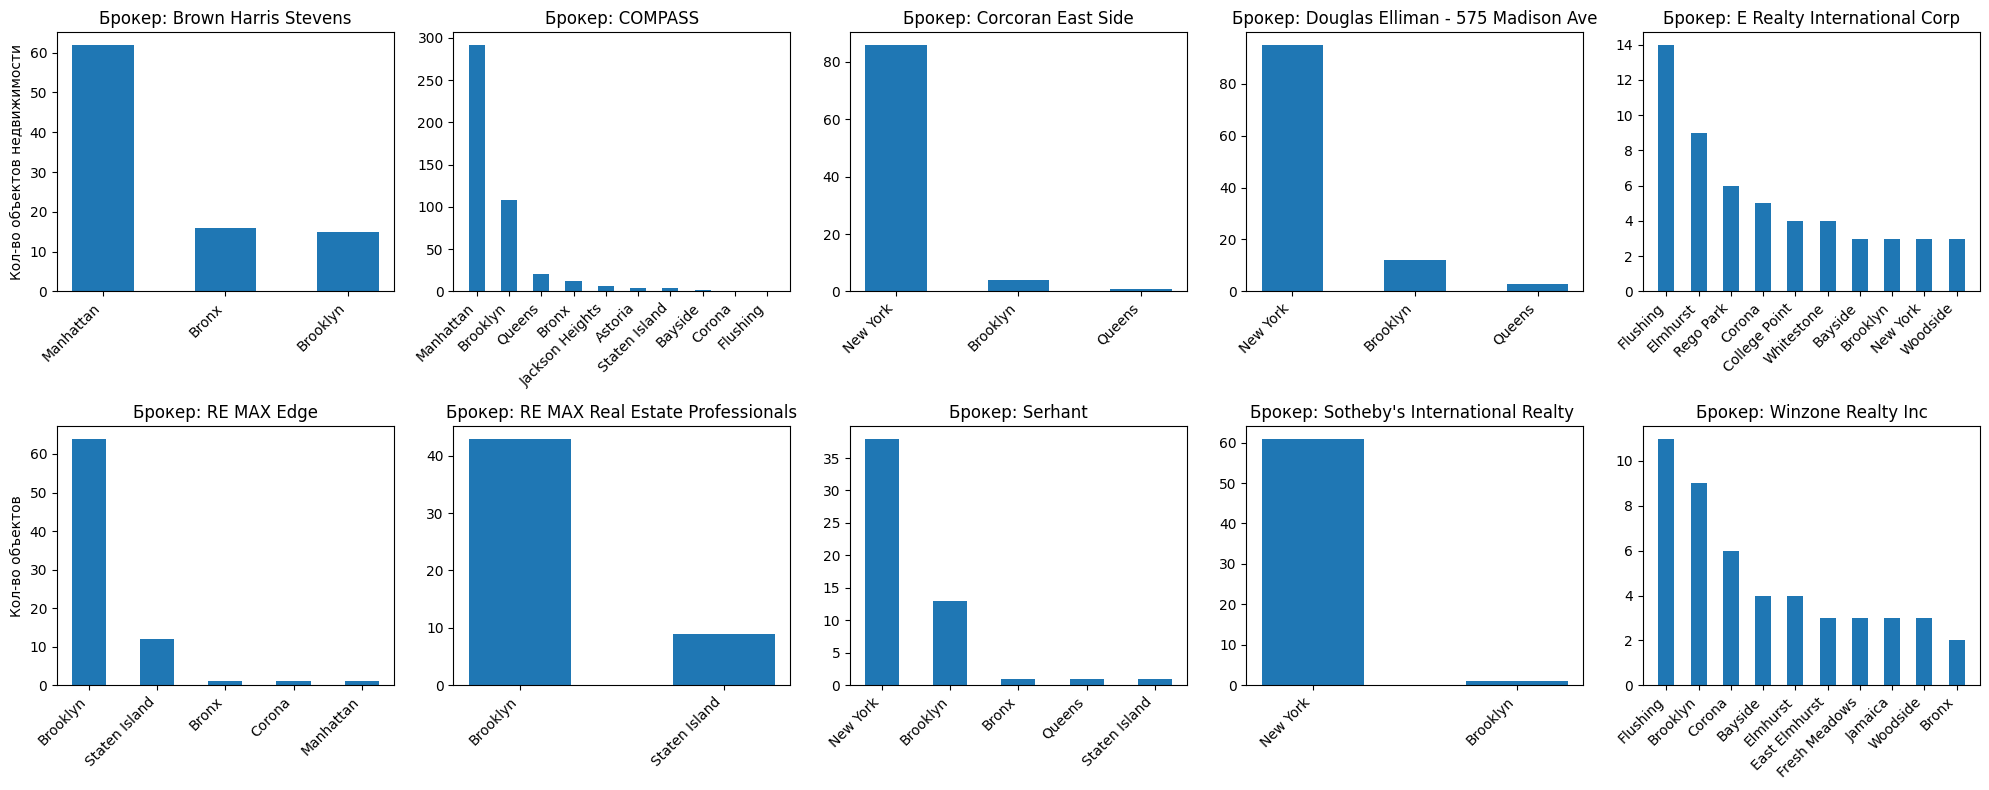

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8))

brokers = top_10_brokers['BROKERTITLE'].unique()

for i, ax in enumerate(axes.flat): #проходимся по осям и одновременно получаем индекс
    states = top_10_brokers[top_10_brokers['BROKERTITLE']==brokers[i]]['STATE'][:10]
    amount = top_10_brokers[top_10_brokers['BROKERTITLE']==brokers[i]]['MAIN_ADDRESS'][:10]

    ax.bar(states, amount, width=0.5)
    ax.set_title(brokers[i].replace('Brokered by','Брокер:'))

    ax.set_xticks([j for j in range(len(states))])
    ax.set_xticklabels(states, rotation=45, ha="right")

axes[0,0].set_ylabel("Кол-во объектов недвижимости")
axes[1,0].set_ylabel("Кол-во объектов")
axes[1,3].set_title(brokers[8].split('-')[0].replace('Brokered by','Брокер:'))

plt.tight_layout() #компонуем
plt.show()

Отсюда также видим, что брокеры делятся на две категории:
1.   те, которые активно занимаются недвижимостью только в 1-2 районах(у таких брокеров, кстати, лидируют New York, Brooklyn и Manhattan);
2.   те, которые занимаются недвижимостью почти равномерно в более чем 5 районах.

#### Кто из брокеров занимается дорогим жильем, а кто дешевым?

Дорогой недвижимостью будем считать объекты с ценой >= 1 000 000\$, а дешевой <= 500 000\$.

In [ ]:
df['IS_EXPENSIVE'] = (df['PRICE']>=1_000_000)
df['IS_MIDDLE'] = ((df['PRICE']<1_000_000) & (df['PRICE']>500_000))
df['IS_CHEAP'] = (df['PRICE']<=500_000)

In [ ]:
df1 = df.groupby('BROKERTITLE').agg({'IS_CHEAP': 'sum', 'IS_MIDDLE': 'sum', 'IS_EXPENSIVE':'sum'})

Возьмем брокеров, у которых есть хотя бы 15 объектов недвижимости:

In [ ]:
df1['TOTAL'] = df1['IS_CHEAP'] + df1['IS_MIDDLE'] + df1['IS_EXPENSIVE']
df1 = df1[df1['TOTAL']>=15]

Считем, что брокер занимается дорогой(или дешевой) недвижимостью, если его доля от общего количества объектов составляет 80%:

In [ ]:
df1['TOTAL'].astype('float64')
for category in ['IS_EXPENSIVE', 'IS_MIDDLE', 'IS_CHEAP']:
  df1[category] = df1[category].astype('float64')
  df1.loc[:,category] = df1[category]/df1['TOTAL']

df1 = df1.reset_index()

In [ ]:
cheap_brokers = df1[df1['IS_CHEAP']>=0.8]['BROKERTITLE'].tolist()
exp_brokers = df1[df1['IS_EXPENSIVE']>=0.8]['BROKERTITLE'].tolist()

print('Брокеры, которые занимаются дешевой недвижимостью: ', ', '.join(cheap_brokers).replace('Brokered by', '') )
print('Брокеры, которые занимаются дорогой недвижимостью: ', ', '.join(exp_brokers).replace('Brokered by', '') )

Брокеры, которые занимаются дешевой недвижимостью:   Re/Max In The City,  Sowae Corp
Брокеры, которые занимаются дорогой недвижимостью:   Serhant,  Sotheby's International Realty - East Side Manhattan Brokerage


In [ ]:
df = df.drop(['IS_EXPENSIVE', 'IS_MIDDLE', 'IS_CHEAP'], axis = 1)

##### Для каждого типа домов определим, в каком районе этот тип дешевле всего продается

In [ ]:
df1 = df.groupby(['TYPE', 'STATE']).agg({'PRICE': ['mean', 'count']})

df1.columns = ['mean_price', 'objects_amount']
df1 = df1.reset_index()

Возьмем районы, где будет хотя бы 5 объектов(чтобы была возможность выбора из дешевых объектов):

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)
df1 = df1[df1['objects_amount']>=5].sort_values(['TYPE', 'mean_price'], ascending=[True,True])

Получаем такой результат:

In [ ]:
types = df1['TYPE'].tolist()
districts = df1['STATE'].tolist()

prev_types = []
print('Тип дома     |     Район')
for i in range(len(types)):
  if types[i] not in prev_types:
    prev_types.append(types[i])
    print(types[i], ' - ', districts[i])

Тип дома     |     Район
Co-op for sale  -  Jamaica
Condo for sale  -  Staten Island
Contingent  -  Staten Island
For sale  -  New York
Foreclosure  -  Staten Island
House for sale  -  Springfield Gardens
Land for sale  -  Staten Island
Multi-family home for sale  -  Far Rockaway
Pending  -  Howard Beach
Townhouse for sale  -  Staten Island
